# Классификация клиентов банка - прогнозирование оттока

## Подключение модулей

In [403]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [404]:
%matplotlib inline

## Загрузка данных

In [405]:
# загружаем данные из файла в формате CSV, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df = pd.read_csv('Churn_Modelling.csv', sep = ';')

In [406]:
# проверяем, что данные загрузились - выводим первые несколько строк таблицы
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.7800,2,1,0,149756.7100,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.0000,2,1,1,10062.8000,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.7400,4,1,0,119346.8800,1
8,9,15792365,He,501,France,Male,44,4,142051.0700,2,0,1,74940.5000,0
9,10,15592389,H?,684,France,Male,27,2,134603.8800,1,1,1,71725.7300,0


In [418]:
# исследование целевого (target) признака - факта ухода клиента 
print('кол-во уникальных значений в таргете: ', df['Exited'].nunique())
print('перечень уникальных значений в таргете: ', df['Exited'].unique())
print('статистика распределения значений в таргете: \n', df['Exited'].value_counts(normalize=True))

кол-во уникальных значений в таргете:  2
перечень уникальных значений в таргете:  [1 0]
статистика распределения значений в таргете: 
 Exited
0   0.7963
1   0.2037
Name: proportion, dtype: float64


In [420]:
# описательная статистика для всех (числовых) признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0000,5000.5000,2886.8957,1.0000,2500.7500,5000.5000,7500.2500,10000.0000
CustomerId,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
CreditScore,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
Balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800


In [422]:
# описательная статистика для всех (числовых) признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0000,5000.5000,2886.8957,1.0000,2500.7500,5000.5000,7500.2500,10000.0000
CustomerId,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
CreditScore,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
Balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800


### Двумерный анализ признаков

In [432]:
# список признаков для анализа
features_eda = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_num']

In [433]:
# создание новой колонки Geography_num и замена символьных значений на целочисленные
df['Geography_num'] = df['Geography']

d = {'France':0, 'Spain':1, 'Germany':2}
df['Geography_num'] = df['Geography_num'].map(d)

In [434]:
df['Gender']= df['Gender'].map({'Male':0, 'Female':1})

In [436]:
# матрица коррелаций
corr = df[features_eda].corr()
corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
CreditScore,1.0000,0.0029,-0.0040,0.0008,0.0063,0.0122,-0.0055,0.0257,-0.0014,-0.0271,0.0083
Gender,0.0029,1.0000,0.0275,-0.0147,-0.0121,0.0219,-0.0058,-0.0225,0.0081,0.1065,0.0169
Age,-0.0040,0.0275,1.0000,-0.0100,0.0283,-0.0307,-0.0117,0.0855,-0.0072,0.2853,0.0481
Tenure,0.0008,-0.0147,-0.0100,1.0000,-0.0123,0.0134,0.0226,-0.0284,0.0078,-0.0140,0.0014
Balance,0.0063,-0.0121,0.0283,-0.0123,1.0000,-0.3042,-0.0149,-0.0101,0.0128,0.1185,0.3487
NumOfProducts,0.0122,0.0219,-0.0307,0.0134,-0.3042,1.0000,0.0032,0.0096,0.0142,-0.0478,-0.0062
HasCrCard,-0.0055,-0.0058,-0.0117,0.0226,-0.0149,0.0032,1.0000,-0.0119,-0.0099,-0.0071,0.0040
IsActiveMember,0.0257,-0.0225,0.0855,-0.0284,-0.0101,0.0096,-0.0119,1.0000,-0.0114,-0.1561,-0.0127
EstimatedSalary,-0.0014,0.0081,-0.0072,0.0078,0.0128,0.0142,-0.0099,-0.0114,1.0000,0.0121,0.0074
Exited,-0.0271,0.1065,0.2853,-0.0140,0.1185,-0.0478,-0.0071,-0.1561,0.0121,1.0000,0.1538


<Axes: >

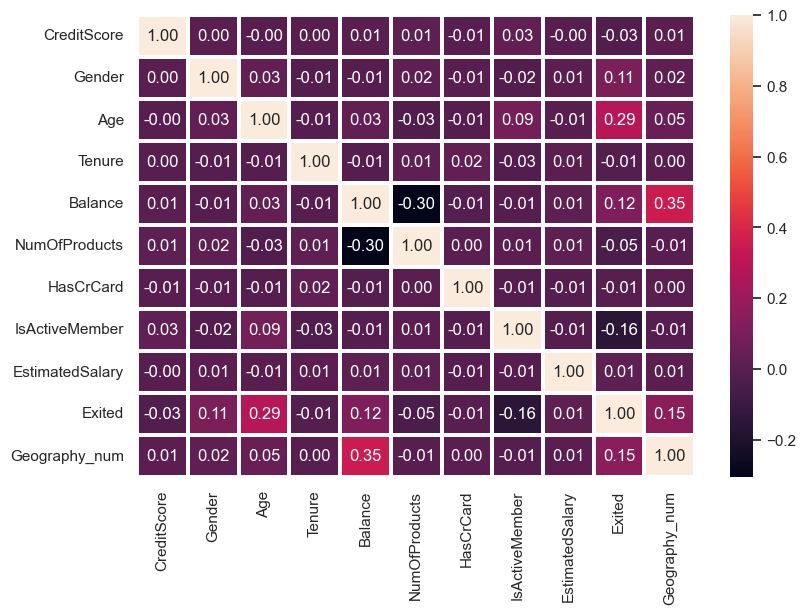

In [437]:
# тепловая карта корреляций между признаками

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

### Преобразование типов

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Geography_num    10000 non-null  int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 1.1+ MB


In [454]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
0,1,15634602,Hargrave,619,France,1,42,2,0.0000,1,1,1,101348.8800,1,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.8600,1,0,1,112542.5800,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.8000,3,1,0,113931.5700,1,0
3,4,15701354,Boni,699,France,1,39,1,0.0000,2,0,0,93826.6300,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.8200,1,1,1,79084.1000,0,1
5,6,15574012,Chu,645,Spain,0,44,8,113755.7800,2,1,0,149756.7100,1,1
6,7,15592531,Bartlett,822,France,0,50,7,0.0000,2,1,1,10062.8000,0,0
7,8,15656148,Obinna,376,Germany,1,29,4,115046.7400,4,1,0,119346.8800,1,2
8,9,15792365,He,501,France,0,44,4,142051.0700,2,0,1,74940.5000,0,0
9,10,15592389,H?,684,France,0,27,2,134603.8800,1,1,1,71725.7300,0,0


### Преобразование небинарных категориальных признаков в набор фиктивных бинарных

In [457]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
geography_cols = pd.get_dummies(df["Geography"], dtype=int)
geography_cols.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


### Формирование дата-сета для обучения моделей

In [458]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']

In [459]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[features_names], geography_cols], axis = 1)
X.shape

(10000, 12)

In [460]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.0000,1,1,1,101348.8800,1,0,0
1,608,1,41,1,83807.8600,1,0,1,112542.5800,0,0,1
2,502,1,42,8,159660.8000,3,1,0,113931.5700,1,0,0
3,699,1,39,1,0.0000,2,0,0,93826.6300,1,0,0
4,850,1,43,2,125510.8200,1,1,1,79084.1000,0,0,1


In [461]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['Exited']

In [462]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

### Modelling

In [463]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [464]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6700, 12) (3300, 12) (6700,) (3300,)


In [465]:
from sklearn.metrics import accuracy_score

### KNeighborsClassifier (Классификация ближайших соседей)

In [466]:
from sklearn.neighbors import KNeighborsClassifier

In [467]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 15.4 ms


KNeighborsClassifier()

In [468]:
# making prediction
knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [469]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [470]:
# performance measurement
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.815820895522388
test accuracy:  0.769090909090909


In [471]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [472]:
from sklearn.naive_bayes import GaussianNB

In [473]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 0 ns
Wall time: 4.01 ms


GaussianNB()

In [474]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [475]:
# performance measurement
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

0.793939393939394

In [476]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

### Random Forest Classifier (Классификатор дерева решений)

In [477]:
from sklearn.ensemble import RandomForestClassifier

In [478]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 203 ms
Wall time: 220 ms


In [479]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [480]:
# performance measurement
from sklearn.metrics import accuracy_score


In [481]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)

### Logistic Regression (Логистическая регрессия)

In [482]:
from sklearn.linear_model import LogisticRegression

In [483]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [484]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_tr, y_train)

CPU times: total: 0 ns
Wall time: 5.01 ms


LogisticRegression(random_state=42)

In [485]:
lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [486]:
# performance measurement
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred_test)

0.8115151515151515

In [487]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)

## Метрики классификации

### KNeighborsClassifier (K-Ближайшие Соседи)

In [504]:
# performance measurement
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predict)
print(cm)
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))
print('test precision_score: ', precision_score(y_test, y_test_predict))
print('test recall_score: ', recall_score(y_test, y_test_predict))
print('test f1_score: ', f1_score(y_test, y_test_predict))

C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[2657    0]
 [ 643    0]]
train accuracy:  0.7919402985074627
test accuracy:  0.8051515151515152
test mean_squared_error:  0.19484848484848485
test mean_absolute_error:  0.19484848484848485
test precision_score:  0.0
test recall_score:  0.0
test f1_score:  0.0


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [505]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2657
           1       0.00      0.00      0.00       643

    accuracy                           0.81      3300
   macro avg       0.40      0.50      0.45      3300
weighted avg       0.65      0.81      0.72      3300



C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


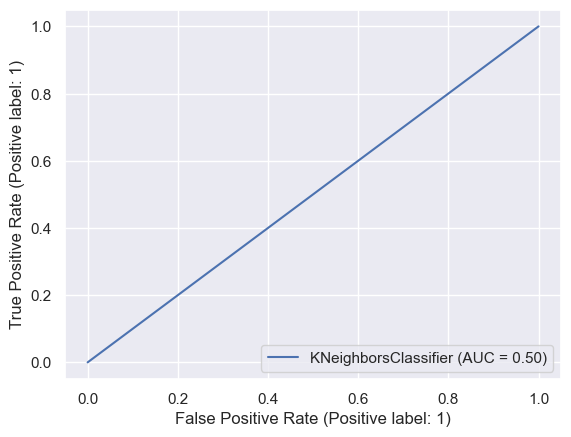

In [506]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)


C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


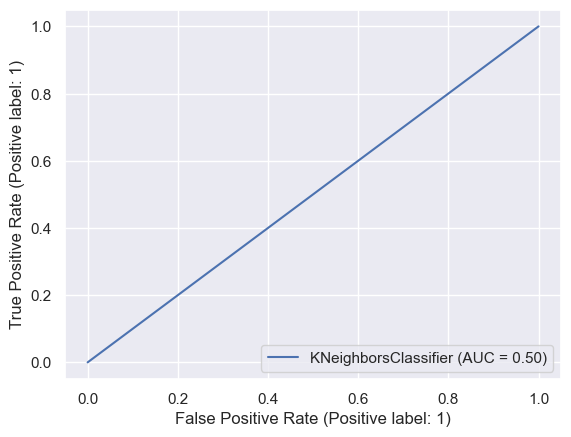

In [507]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

In [508]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_predict, average='macro')

0.5

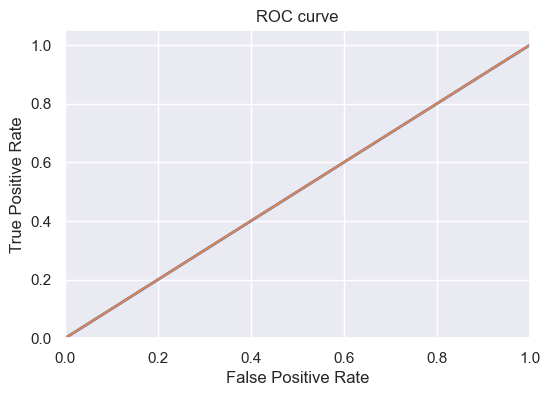

In [509]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

Один из способов сравнения классификаторов предусматривает измере­ние площади под кривой (англ. Area Under the Curve — AUC). Безупречный клас­сификатор будет иметь площадь под ROC-кривой (ROC-AUC), равную 1, тогда как чисто случайный классификатор - площадь 0.5.

### Gaussian Naive Bayes (Наивный Байес)

In [510]:
# performance measurement
y_train_predict = gnb.predict(X_train)
y_test_predict = gnb.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predict)
print(cm)
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))
print('test precision_score: ', precision_score(y_test, y_test_predict))
print('test recall_score: ', recall_score(y_test, y_test_predict))
print('test f1_score: ', f1_score(y_test, y_test_predict))

[[2657    0]
 [ 643    0]]
train accuracy:  0.7919402985074627
test accuracy:  0.8051515151515152
test mean_squared_error:  0.19484848484848485
test mean_absolute_error:  0.19484848484848485
test precision_score:  0.0
test recall_score:  0.0
test f1_score:  0.0


C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [511]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2657
           1       0.00      0.00      0.00       643

    accuracy                           0.81      3300
   macro avg       0.40      0.50      0.45      3300
weighted avg       0.65      0.81      0.72      3300



C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


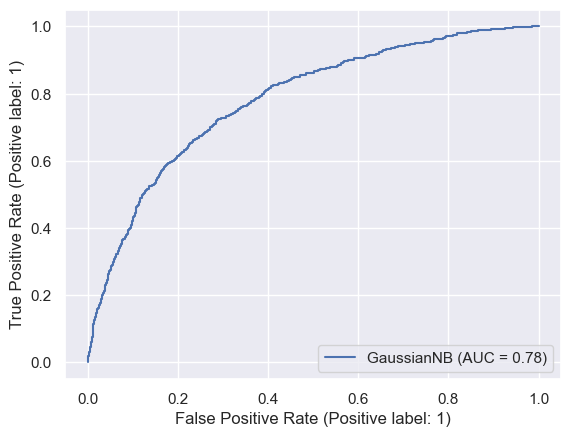

In [512]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


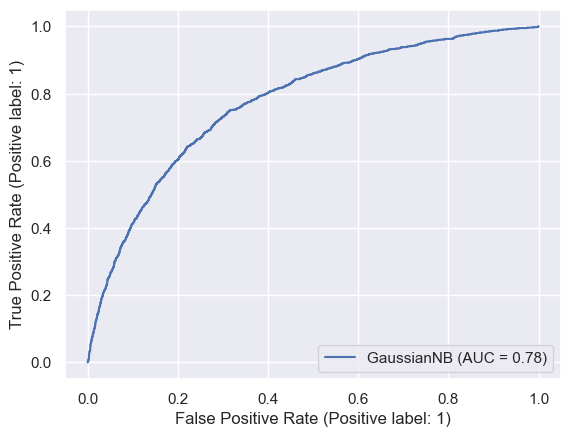

In [513]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_train, y_train)

In [514]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_predict, average='macro')

0.5

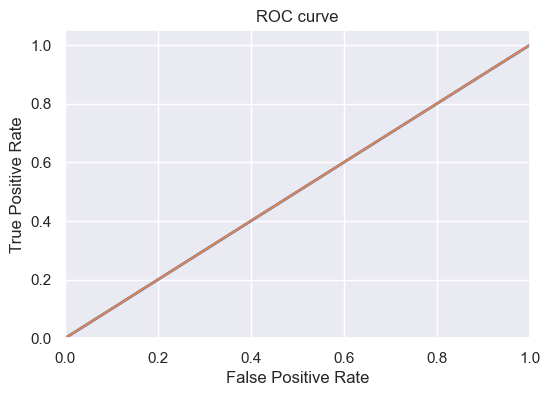

In [515]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Random Forest Classifier (Случайные леса)

In [516]:
# performance measurement
y_train_predict = rfc.predict(X_train)
y_test_predict = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predict)
print(cm)
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))
print('test precision_score: ', precision_score(y_test, y_test_predict))
print('test recall_score: ', recall_score(y_test, y_test_predict))
print('test f1_score: ', f1_score(y_test, y_test_predict))

[[1860  797]
 [ 452  191]]
train accuracy:  0.6104477611940299
test accuracy:  0.6215151515151515
test mean_squared_error:  0.3784848484848485
test mean_absolute_error:  0.3784848484848485
test precision_score:  0.19331983805668015
test recall_score:  0.29704510108864696
test f1_score:  0.23421213979153893


C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [517]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      2657
           1       0.19      0.30      0.23       643

    accuracy                           0.62      3300
   macro avg       0.50      0.50      0.49      3300
weighted avg       0.69      0.62      0.65      3300



C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


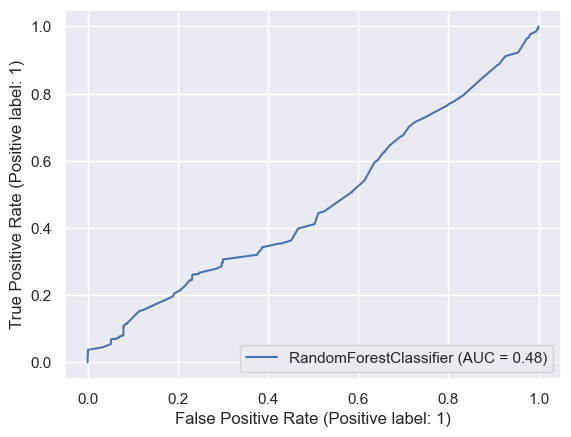

In [518]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


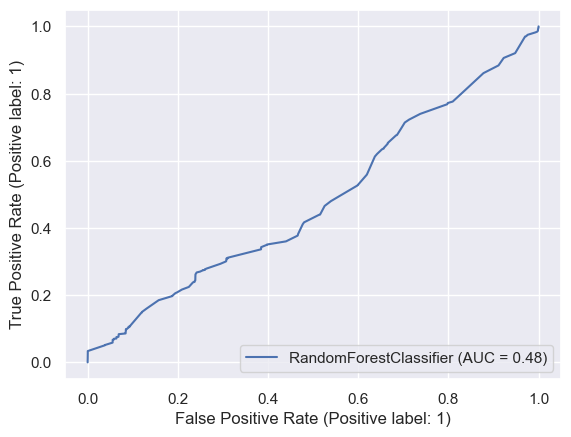

In [530]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_train, y_train)

In [520]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_predict, average='macro')

0.49854136876035654

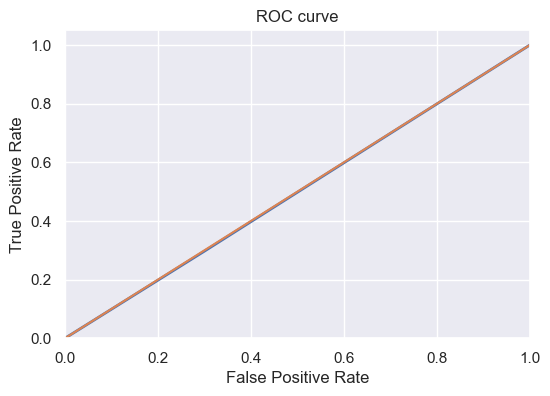

In [521]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Logistic Regression (Логистическая регрессия)

In [522]:
# performance measurement
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predict)
print(cm)
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))
print('test precision_score: ', precision_score(y_test, y_test_predict))
print('test recall_score: ', recall_score(y_test, y_test_predict))
print('test f1_score: ', f1_score(y_test, y_test_predict))

[[2545  112]
 [ 510  133]]
train accuracy:  0.8097014925373134
test accuracy:  0.8115151515151515
test mean_squared_error:  0.18848484848484848
test mean_absolute_error:  0.18848484848484848
test precision_score:  0.5428571428571428
test recall_score:  0.20684292379471228
test f1_score:  0.29954954954954954


In [523]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2657
           1       0.54      0.21      0.30       643

    accuracy                           0.81      3300
   macro avg       0.69      0.58      0.60      3300
weighted avg       0.78      0.81      0.78      3300



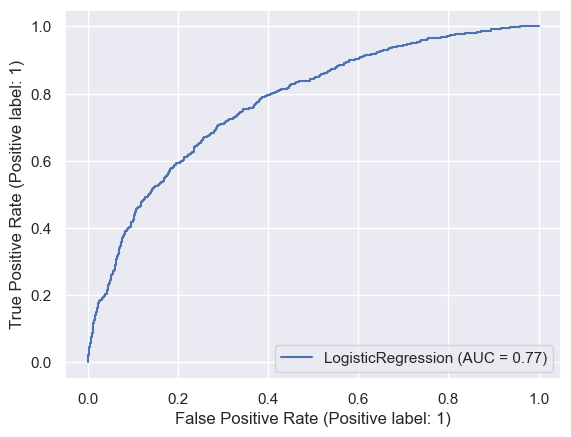

In [525]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

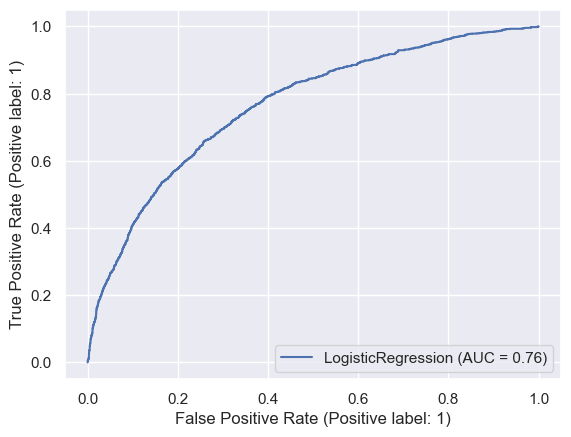

In [527]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_train, y_train)

In [528]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_predict, average='macro')

0.5823450599402616

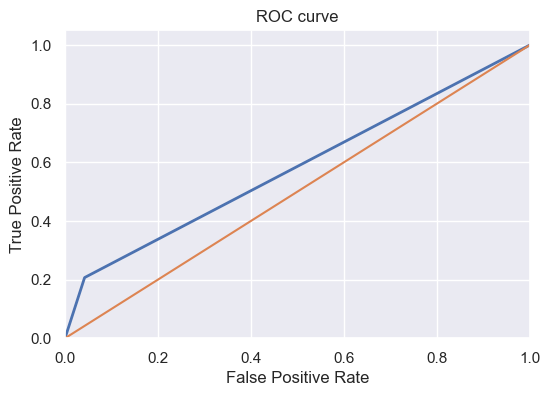

In [529]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## Метрики классификации

In [488]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [489]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]


In [490]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.7691
1,Gaussian Naive Bayes,0.7939
2,Random Forest Classifier,0.8712
3,Logistic Regression,0.8115


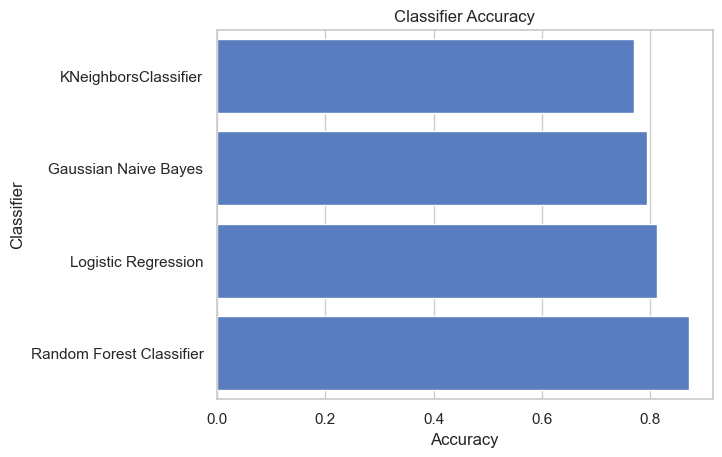

In [491]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

- KNeighborsClassifier: Эта модель использует расстояние до k ближайших соседей для классификации объектов. 
    Она имеет точность 0.7691, что является достаточно хорошим результатом, но не самым высоким среди представленных моделей.

- Gaussian Naive Bayes: Этот классификатор основан на теореме Байеса и предполагает, что признаки независимы. 
    Его точность составляет 0.7939, что уже лучше, чем у KNeighborsClassifier.

- Logistic Regression: Логистическая регрессия используется для прогнозирования вероятности принадлежности к классу. 
    Она достигает точности 0.8115, улучшая результаты предыдущих моделей.

- Random Forest Classifier: Эта модель представляет собой ансамбль деревьев решений и известна своей высокой 
    надежностью и точностью. Она показывает наилучший результат среди всех перечисленных классификаторов с точностью 0.8712.

Итак, на основании показателей точности, Random Forest Classifier является наилучшей моделью для ваших данных. 
Это может быть связано с ее способностью учитывать взаимодействие между различными признаками и уменьшать переобучение, 
что делает её более эффективной при работе с комплексными задачами классификации.